# Data Analysis of Global Terrorism Database From 1970 to 2017
---

## Project Description
---
##### Context
The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.

##### Motivation
In recent years, Global Terrorism has become a serious National and International issue as the world continues to be plagued by rampant terrorist attacks despite international efforts to prevent such attacks. It has disrupted our way of life more than we could have imagined. This project aims to conduct Data Exploration on the Global Terrorism Dataset in hopes of discovering insights behind terrorist attacks. 

##### Objective

* Text/Sentiment Analysis of Reports On Terrorist Attacks - WordCloud
* Identify Which Feature Is More Important In Contributing To The Success of A Terrorist Attack
* Determine Whether Terrorist Attacks Are More Concentrated In Certain Regions (column K - region_txt)/countries (column I - country_txt)
* Determine Whether There Is A Prevalent Attack Type (column AD - AH) and terrorist group name (column BG - gname)
* Determine Whether There Is Any Correlation Between The Terrorist Group Name (column BG - gname) & Target Type (e.g. Civilian/Military/Aircraft, column AL - targsubtype1_txt)

1. Discover otivation of different attacks.
2. The ranking of different attacks
3. Common area/location/country of the attacks
4. Area/location/country that has the most attacks
5. Review features that are common amongst all attacks



# Dataset Evaluation
---
The Global Terrorism Dataset used for this data analytics project is from kaggle. The dataset includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. **For this project, we decied to focus our Data Analysis from Year 2000 to Year 2017.** The dataset consist of the following columns:

1. eventid : A 12-digit Event ID system. First 8 numbers – date recorded “yyyymmdd”. Last 4 numbers – sequential 
2. iyear : This field contains the year in which the incident occurred.
3. imonth : This field contains the number of the month in which the incident occurred.
4. iday : This field contains the numeric day of the month on which the incident occurred.
5. extended : 1 = "Yes" The duration of an incident extended more than 24 hours. 0 = "No" The duration of an incident extended less 
6. country_txt : This field identifies the country or location where the incident occurred.
7. region_txt : This field identifies the region in which the incident occurred.
8. city : Name of the city, village, or town in which the incident occurred
9. latitude : The latitude of the city in which the event occurred.
10. longitude : The longitude of the city in which the event occurred.
11. summary : summary of the event
12. success : Success of a terrorist strike
13. suicide : 1 = "Yes" The incident was a suicide attack. 0 = "No" There is no indication that the incident was a suicide attack.
14. attacktype1 : The general mthod of attack
15. attacktype1_txt : The general method of attack and broad class of tactics used.
16. natlty1_txt :  The nationality of the target that was attacked
17. gname : The name of the group that carried out the attack
18. nperps : The total number of terrorists participating in the incident
19. weaptype1_txt : General type of weapon used in the incident
20. weapsubtype1_txt : More specific value for most of the Weapon Types
21. nkill : The number of total confirmed fatalities for the incident
22. nkillus: he number of U.S. citizens who died as a result of the incident
23. nwound : Number of confirmed non-fatal injuries to both perpetrators and victims.
24. nwoundus : The number of confirmed non-fatal injuries to U.S. citizens, both perpetrators and victims.



---
## Importing necessary libraries

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
# import the relevant packages
import re
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
# Plot inline in Jupyter notebook
%matplotlib inline
import math
import mplleaflet

# import the relevant libraries from nltk
import nltk
nltk.download("stopwords")
nltk.download("words")


from wordcloud import WordCloud
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords, words

import statsmodels.api as sm #key library to do regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from pylab import *

# Decision Tree
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


# Display all floats rounded off to 1 decimal place
pd.options.display.float_format = '{:,.2f}'.format

# Settings throughout the notebook
sns.set()

# Width = 16, Height = 6
DIMS=(16, 6)

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/minhan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /Users/minhan/nltk_data...
[nltk_data]   Package words is already up-to-date!


## The Data
---

In [2]:
df = pd.read_csv("globalterrorismdb_2000to2017.csv")
df.head(3)

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,addnotes,scite1,scite2,scite3
0,200001010001,2000,1,1,0,139,Namibia,11,Sub-Saharan Africa,Kavango,...,nan,-9,nan,NaN,nan,NaN,NaN,“Namibia: UNITA Rebels Reportedly Abduct 20 Vi...,“Namibia: 4 Injured in Shootout; UNITA 'Bandit...,“Abducted Namibians Reportedly Still Held by U...
1,200001010002,2000,1,1,1,139,Namibia,11,Sub-Saharan Africa,Kavango,...,nan,-9,nan,NaN,nan,NaN,NaN,“Namibia: UNITA Rebels Reportedly Abduct 20 Vi...,“Namibia: 4 Injured in Shootout; UNITA 'Bandit...,“Abducted Namibians Reportedly Still Held by U...
2,200001010003,2000,1,1,0,92,India,6,South Asia,Jammu and Kashmir,...,nan,-9,nan,NaN,nan,NaN,NaN,“Lashkar 'Suicide' Squad Attacks Army Camp in ...,NaN,NaN


---
## Data Cleaning & Exploration

In [3]:
#print(np.isnan(np.nan))
cleanDF = df.copy()
cleanDF = cleanDF.drop(['scite1', 'scite2', 'scite3', 'addnotes', 'propcomment', 'propvalue', 'propextent_txt', 'propextent', 'property'], axis=1)

cleanDF['latitude'].replace('', np.nan, inplace=True)
cleanDF['longitude'].replace('', np.nan, inplace=True)
cleanDF['country'].replace('', np.nan, inplace=True)
cleanDF['nkill'].replace(np.NaN, 0, inplace=True)
cleanDF['nkill'].dropna(inplace=True)
cleanDF['nkillter'].replace(np.NaN, 0, inplace=True)
cleanDF['nkillter'].dropna(inplace=True)
cleanDF['nwound'].replace(np.NaN, 0, inplace=True)
cleanDF['nwound'].dropna(inplace=True)
cleanDF['nwoundte'].replace(np.NaN, 0, inplace=True)
cleanDF['nwoundte'].dropna(inplace=True)

In [5]:
cleanDF.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,motive,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weapdetail,nkill,nkillter,nwound,nwoundte
0,200001010001,2000,1,1,0,139,Namibia,11,Sub-Saharan Africa,Kavango,...,Unknown,5,Firearms,5.00,Unknown Gun Type,NaN,0.00,0.00,7.00,0.00
1,200001010002,2000,1,1,1,139,Namibia,11,Sub-Saharan Africa,Kavango,...,Unknown,5,Firearms,5.00,Unknown Gun Type,NaN,0.00,0.00,7.00,0.00
2,200001010003,2000,1,1,0,92,India,6,South Asia,Jammu and Kashmir,...,Unknown,5,Firearms,5.00,Unknown Gun Type,A sniper rifle was used in addition to other g...,1.00,0.00,2.00,0.00
3,200001010004,2000,1,1,0,1003,Kosovo,9,Eastern Europe,Kosovo (Province),...,Unknown,6,Explosives,16.00,Unknown Explosive Type,NaN,0.00,0.00,1.00,0.00
4,200001010005,2000,1,1,0,182,Somalia,11,Sub-Saharan Africa,Banaadir,...,It was possible the attack was a form of clan-...,5,Firearms,5.00,Unknown Gun Type,NaN,6.00,0.00,10.00,0.00


In [6]:
cleanDF.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,attacktype3,targtype1,targsubtype1,natlty1,weaptype1,weapsubtype1,nkill,nkillter,nwound,nwoundte
count,"65,499.00","65,499.00","65,499.00","65,499.00","65,499.00","65,499.00","65,499.00","64,923.00","64,923.00","65,493.00",...,211.00,"65,499.00","62,349.00","65,011.00","65,499.00","61,715.00","65,499.00","65,499.00","65,499.00","65,499.00"
mean,"200,992,866,999.10","2,009.86",6.21,15.37,0.05,121.74,7.81,26.70,52.29,1.44,...,4.59,8.44,47.28,127.24,6.20,11.66,2.32,0.28,4.00,0.04
std,"386,441,687.18",3.87,3.34,8.81,0.22,92.32,2.36,13.12,37.70,0.92,...,2.24,6.45,29.72,94.20,1.82,6.17,12.89,3.05,47.74,1.01
min,"200,001,010,001.00","2,000.00",1.00,0.00,0.00,4.00,1.00,-41.29,-124.22,1.00,...,1.00,1.00,1.00,4.00,1.00,1.00,0.00,0.00,0.00,0.00
25%,"200,804,040,007.50","2,008.00",3.00,8.00,0.00,92.00,6.00,18.08,43.13,1.00,...,2.00,3.00,23.00,92.00,5.00,5.00,0.00,0.00,0.00,0.00
50%,"201,107,300,006.00","2,011.00",6.00,15.00,0.00,95.00,8.00,32.65,45.33,1.00,...,6.00,4.00,36.00,97.00,6.00,12.00,1.00,0.00,0.00,0.00
75%,"201,307,110,038.50","2,013.00",9.00,23.00,0.00,155.00,10.00,34.24,71.52,1.00,...,7.00,14.00,71.00,160.00,6.00,16.00,2.00,0.00,3.00,0.00
max,"201,407,210,027.00","2,014.00",12.00,31.00,1.00,"1,004.00",12.00,65.68,179.37,5.00,...,7.00,22.00,113.00,"1,004.00",13.00,31.00,"1,570.00",500.00,"8,191.00",200.00


---

## Part I: Text Analysis Through Word Cloud

Based on our general understanding of reports on terrorist attacks, we hypothesised that words such as: "Attack", "Claimed Responsibility" would occur most frequently. In this part, we are going to conduct Text Analysis to understand whether our preconceived notions about these terrorist attacks were true by creating a Word Cloud.

In [7]:
descriptions_series = cleanDF["summary"]
descriptions_series.head()
descriptions_list = descriptions_series.tolist()

descriptions_step1 = []
for d in descriptions_list:  
    # Remove special characters
    d2 = re.sub('[-_,$&!.;%]', '', d) 
    # Convert to lower case, remove leading and trailing spaces
    d2 = d2.strip().lower()   
    descriptions_step1.append(d2)
descriptions_step1[0:5]

long_str_descriptions = ''
# Join all the descriptions to get a long string using a for loop
long_str_descriptions = " ".join(descriptions_step1)

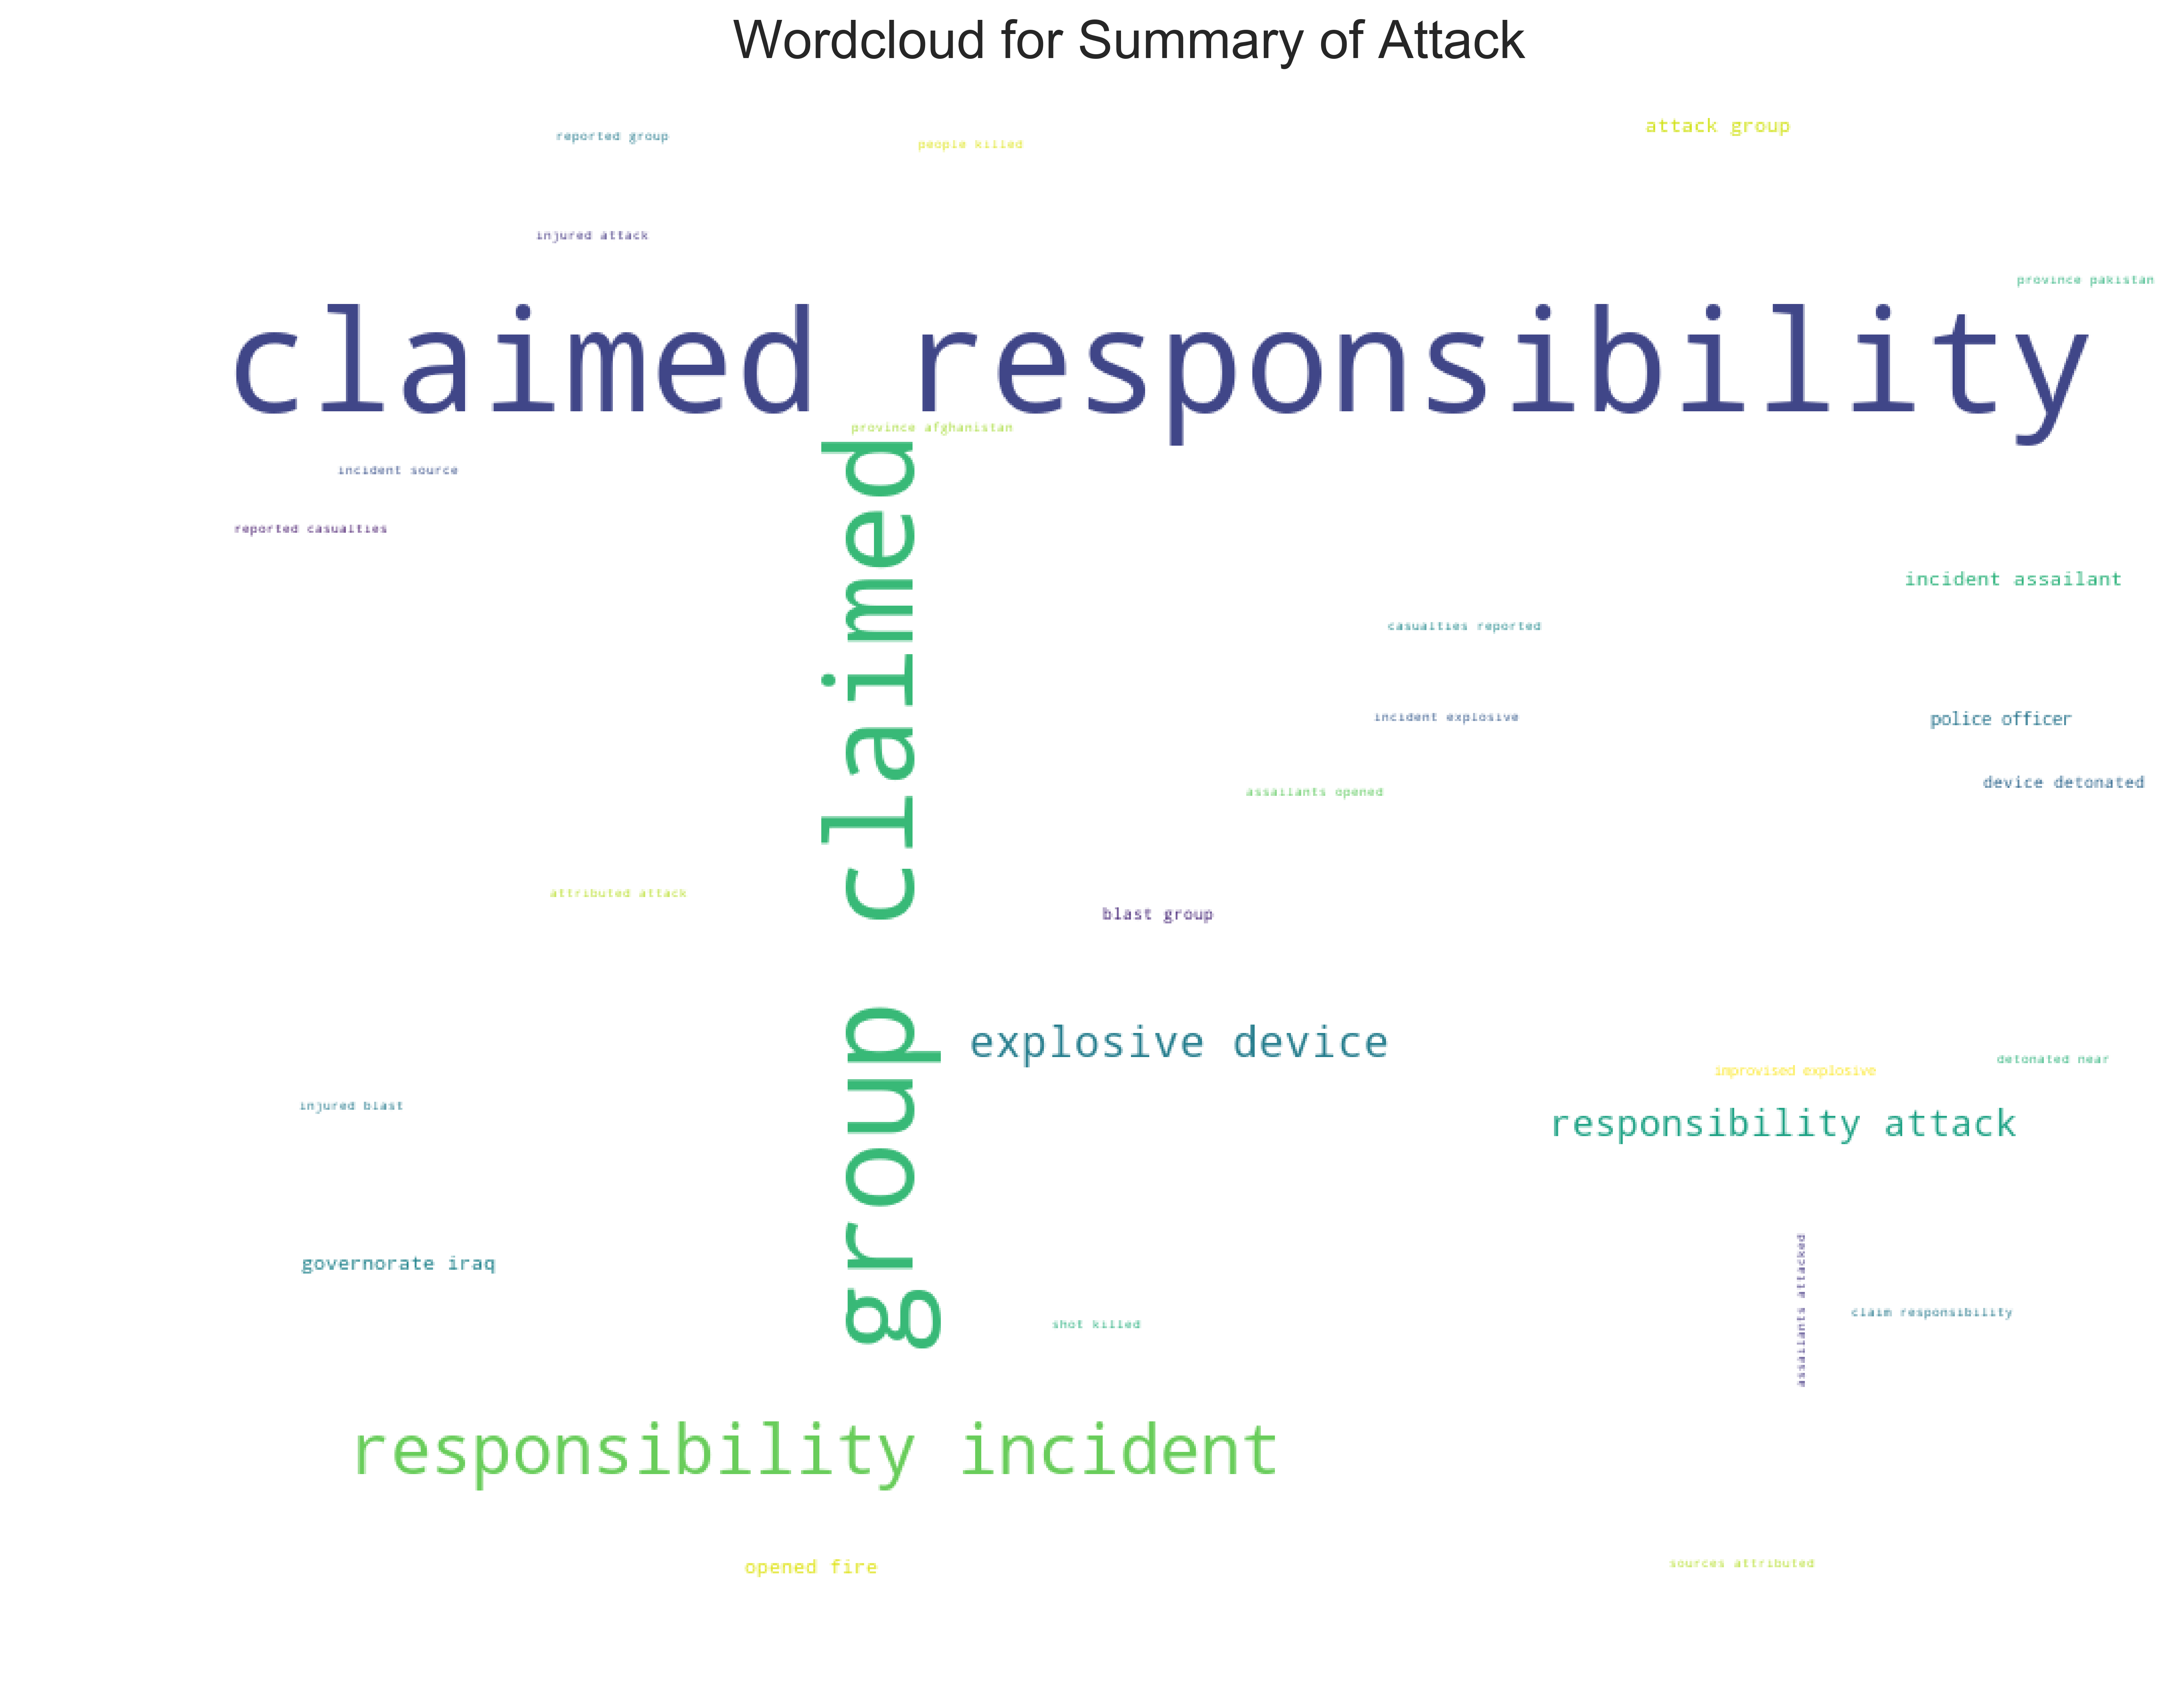

In [8]:
# Plot the wordcloud
desc_wordcloud = WordCloud(
    width=1024, height=768,
    background_color="white", 
    max_words=30, relative_scaling=1.0).generate(long_str_descriptions)
plt.figure(figsize=(16,9), dpi=500)
plt.imshow(desc_wordcloud)
plt.axis("off")

# Add the title
plt.title("Wordcloud for Summary of Attack", fontsize=20)
plt.show()

### Conclusion From Part I

The phrases that struck out the most were 'claimed responsibility', 'group claimed', 'responsibility incident' - the text analysis tallied with our hypothesis. Now, we proceed to determine specific commanalities between the attacks.

---

## Part II: Determining Extent of Attacks

Extent of attacks can be measured by looking at the count of total wounded, count of terrorists wounded, count of total killed, and count of terrorists killed.

We seek to understand the impact of these attacks to possibly understand the motivation behind these terrorist attacks - are terrorists seeking to wound and kill, or simply strike fear among the public and let their agendas be made known?

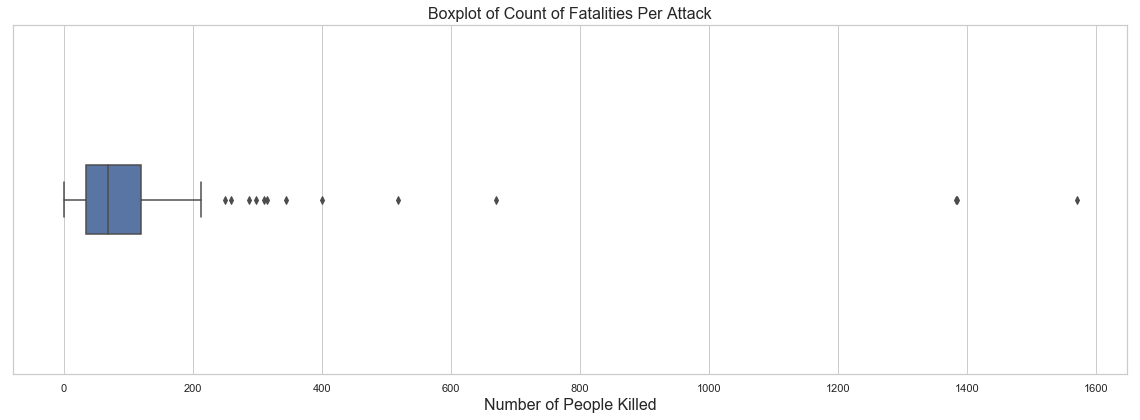

In [19]:
# Box plot of number of kills 
nkill_graph = cleanDF.copy()
nkill_agg2 = nkill_graph.groupby('nkill').size().reset_index(name='count')
nkill_agg2

sns.set(style="whitegrid")
fig = plt.figure(figsize=(16, 6))
fig.add_subplot(111)
sns.boxplot(nkill_agg2['nkill'], orient="h", width=0.2)
plt.title("Boxplot of Count of Fatalities Per Attack", fontsize = 16)
plt.xlabel("Number of People Killed", fontsize = 16)
# Show the boxplot
plt.show()

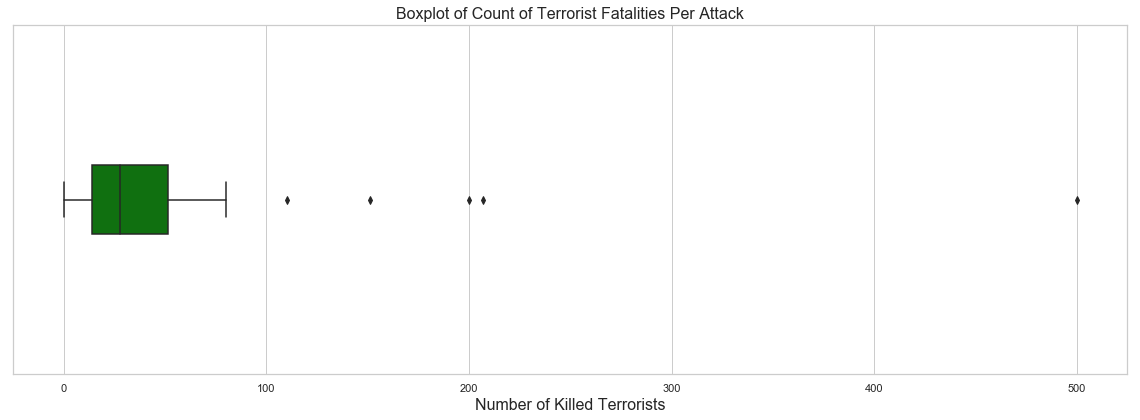

In [20]:
# Box plot of number of terrorist kills (suicides) 
nkillter_graph = cleanDF.copy()
nkillter_agg = nkillter_graph.groupby('nkillter').size().reset_index(name='count')
nkillter_agg

sns.set(style="whitegrid")
fig = plt.figure(figsize=(16, 6))
fig.add_subplot(111)
sns.boxplot(nkillter_agg['nkillter'], orient="h", width=0.2, color='Green')
plt.title("Boxplot of Count of Terrorist Fatalities Per Attack", fontsize = 16)
plt.xlabel("Number of Killed Terrorists", fontsize = 16)
# Show the boxplot
plt.show()

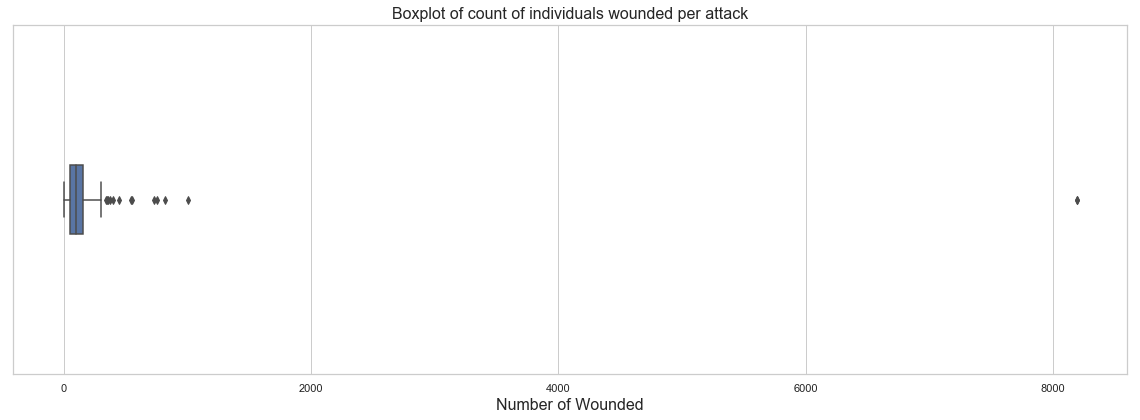

In [23]:
# Box plot of number of individuals wounded 
nwound_graph = cleanDF.copy()
nwound_agg = nwound_graph.groupby('nwound').size().reset_index(name='count')
nwound_agg

sns.set(style="whitegrid")
fig = plt.figure(figsize=(16, 6))
fig.add_subplot(111)
sns.boxplot(nwound_agg['nwound'], orient="h", width=0.2)
plt.title("Boxplot of count of individuals wounded per attack", fontsize = 16)
plt.xlabel("Number of Wounded", fontsize = 16)
# Show the boxplot
plt.show()

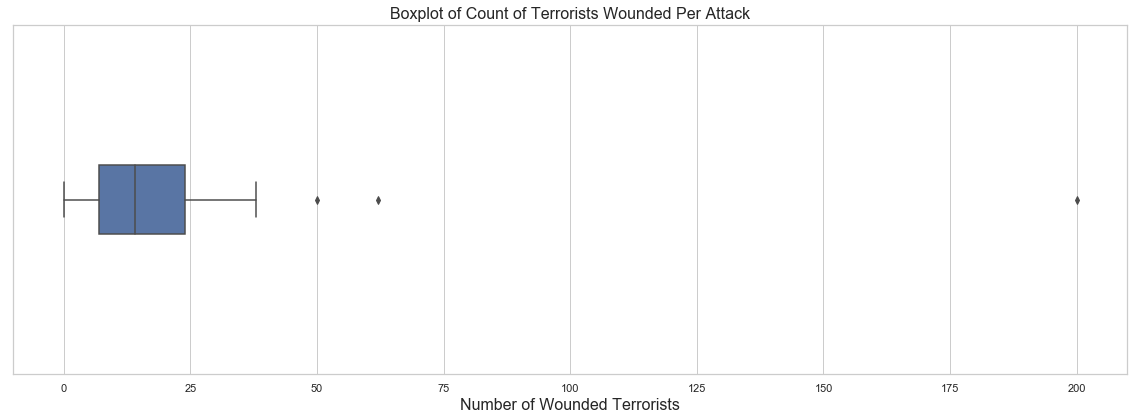

In [24]:
# Box plot of number of terrorists wounded 
nwoundte_graph = cleanDF.copy()
nwoundte_agg = nwoundte_graph.groupby('nwoundte').size().reset_index(name='count')
nwoundte_agg

sns.set(style="whitegrid")
fig = plt.figure(figsize=(16, 6))
fig.add_subplot(111)
sns.boxplot(nwoundte_agg['nwoundte'], orient="h", width=0.2)
plt.title("Boxplot of Count of Terrorists Wounded Per Attack", fontsize = 16)
plt.xlabel("Number of Wounded Terrorists", fontsize = 16)
# Show the boxplot
plt.show()

### Conclusion from Part II

From the box plots, it is clear that the data set is skewed to the left - with the exception of outliers, where the extent of attacks are huge, most attacks are relatively subdued. This indicates that terrorists, while they may be seeking to wound and kill, they are possibly more interested in striking fear among the public and let their agendas be made known.

---

## Part III: Discovering common features among attacks

In this part, we seek to determine the common features that stood out among the attacks. This allows us to understand underlying patterns of terrorist groups.

In [25]:
mappingDF = cleanDF.drop_duplicates(subset=['longitude','latitude','success'])
# pd.pivot_table(mappingDF, index='success',columns='longitude',values='latitude', aggfunc='count')
mappingDF['attacktype1_txt'].unique()

array(['Armed Assault', 'Bombing/Explosion',
       'Facility/Infrastructure Attack', 'Unknown', 'Unarmed Assault',
       'Assassination', 'Hostage Taking (Kidnapping)', 'Hijacking',
       'Hostage Taking (Barricade Incident)'], dtype=object)

In [26]:
ranking_on_attack = mappingDF.groupby(['attacktype1_txt'])['nkill', 'nwound'].sum().reset_index()
ranking_on_attack = ranking_on_attack.sort_values(['nkill'], ascending=False)
print(ranking_on_attack)

                       attacktype1_txt     nkill    nwound
0                        Armed Assault 22,166.00 11,483.00
2                    Bombing/Explosion 16,533.00 35,842.00
8                              Unknown  3,172.00  1,700.00
6          Hostage Taking (Kidnapping)  2,923.00  1,337.00
1                        Assassination  1,767.00  1,803.00
4                            Hijacking  1,698.00  8,355.00
3       Facility/Infrastructure Attack  1,022.00    840.00
5  Hostage Taking (Barricade Incident)    498.00    765.00
7                      Unarmed Assault    262.00  1,364.00


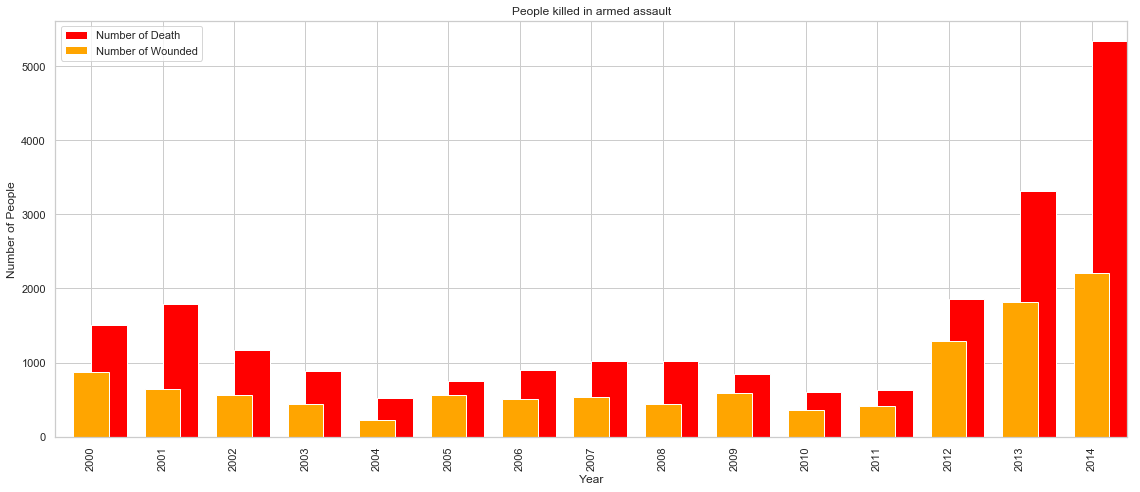

In [27]:
Armed_Assault = mappingDF[(mappingDF["attacktype1_txt"] == "Armed Assault")]
Armed_Assault_Year = Armed_Assault.groupby(['iyear'])['nkill', 'nwound'].sum().reset_index().sort_values(['iyear'], ascending=True)
#print(Armed_Assault_Year)

fig, ax1 = plt.subplots(figsize=(16,7))

Armed_Assault_Year.plot(kind="bar", x='iyear', y='nkill', position=0, ax=ax1, color="red")
Armed_Assault_Year.plot(kind="bar", x='iyear', y='nwound', stacked=True, ax=ax1, color="orange")

ax1.set_ylabel("Number of People")
ax1.set_xlabel("Year")
ax1.set_title("People killed in armed assault")
ax1.legend(["Number of Death", "Number of Wounded"])
plt.show()

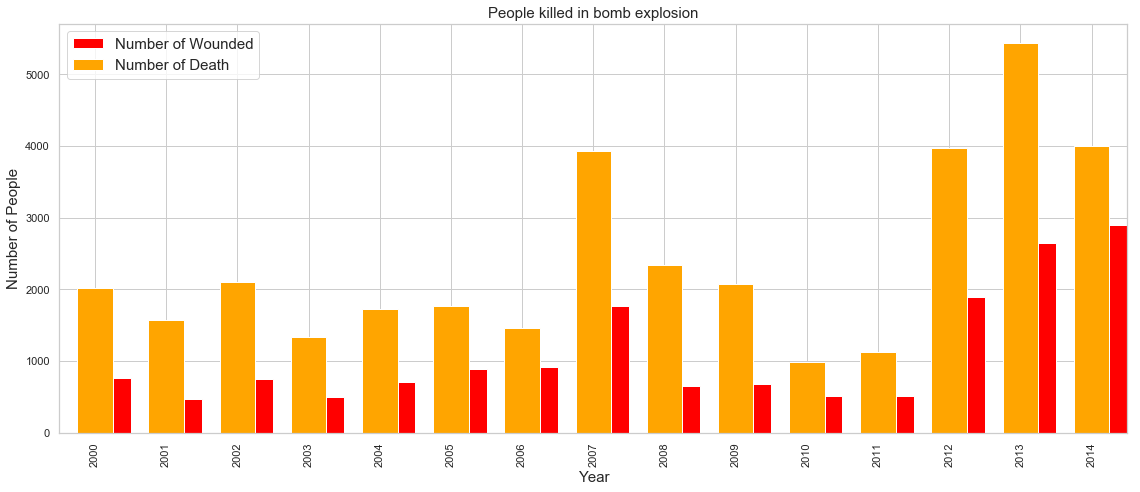

In [30]:
Bombing_Explosion = mappingDF[(mappingDF["attacktype1_txt"] == "Bombing/Explosion")]
Bombing_Explosion_Year = Bombing_Explosion.groupby(['iyear'])['nkill', 'nwound'].sum().reset_index().sort_values(['iyear'], ascending=True)

fig, ax1 = plt.subplots(figsize=(16,7))

Bombing_Explosion_Year.plot(kind="bar", x='iyear', y='nkill', position=0, ax=ax1, color="red")
Bombing_Explosion_Year.plot(kind="bar", x='iyear', y='nwound', stacked=True, ax=ax1, color="orange")

ax1.set_ylabel("Number of People", fontsize = 15)
ax1.set_xlabel("Year", fontsize = 15)
ax1.set_title("People killed in bomb explosion", fontsize = 15)
ax1.legend(["Number of Wounded", "Number of Death"], fontsize = 15)
plt.show()

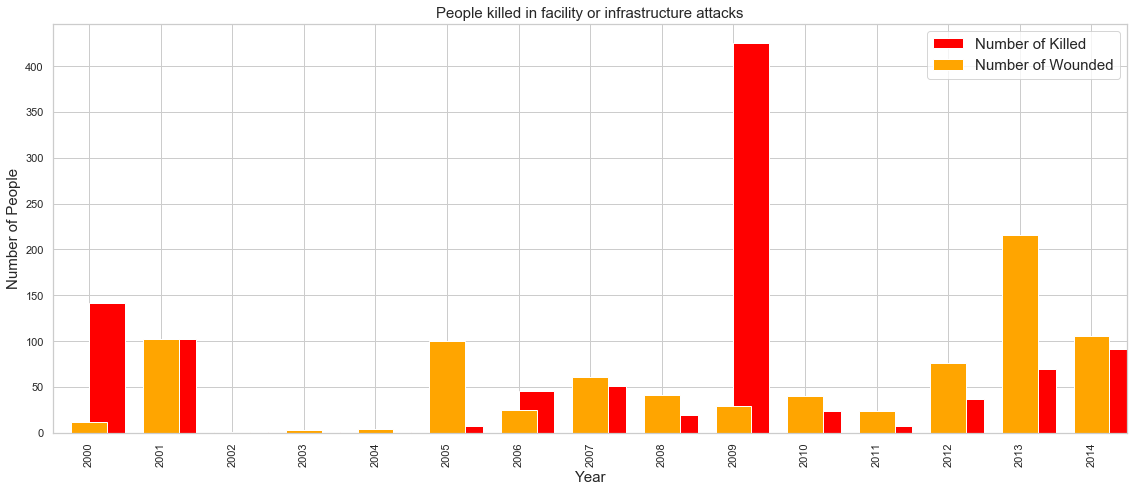

In [31]:
Facility_Infrastructure_Attack = mappingDF[(mappingDF["attacktype1_txt"] == "Facility/Infrastructure Attack")]
Facility_Infrastructure_Attack_Year = Facility_Infrastructure_Attack.groupby(['iyear'])['nkill', 'nwound'].sum().reset_index().sort_values(['iyear'], ascending=True)

fig, ax1 = plt.subplots(figsize=(16,7))

Facility_Infrastructure_Attack_Year.plot(kind="bar", x='iyear', y='nkill',position=0, ax=ax1, color="red")
Facility_Infrastructure_Attack_Year.plot(kind="bar", x='iyear', y='nwound', stacked=True, ax=ax1, color="orange")

ax1.set_ylabel("Number of People", fontsize = 15)
ax1.set_xlabel("Year", fontsize = 15)
ax1.set_title("People killed in facility or infrastructure attacks", fontsize = 15)
ax1.legend(["Number of Killed", "Number of Wounded"], fontsize = 15)
plt.show()

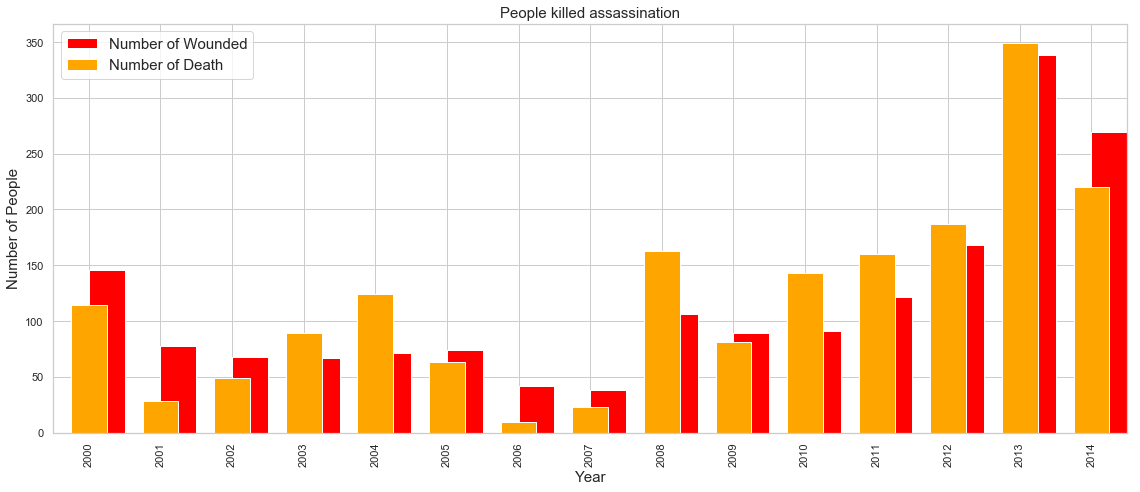

In [32]:
Assassination = mappingDF[(mappingDF["attacktype1_txt"] == "Assassination")]
Assassination_Year = Assassination.groupby(['iyear'])['nkill', 'nwound'].sum().reset_index().sort_values(['iyear'], ascending=True)

fig, ax1 = plt.subplots(figsize=(16,7))

Assassination_Year.plot(kind="bar", x='iyear', y='nkill', position=0, ax=ax1, color="red")
Assassination_Year.plot(kind="bar", x='iyear', y='nwound', stacked=True, ax=ax1, color="orange")

ax1.set_ylabel("Number of People", fontsize = 15)
ax1.set_xlabel("Year", fontsize = 15)
ax1.set_title("People killed assassination", fontsize = 15)
ax1.legend(["Number of Wounded", "Number of Death"], fontsize = 15)
plt.show()

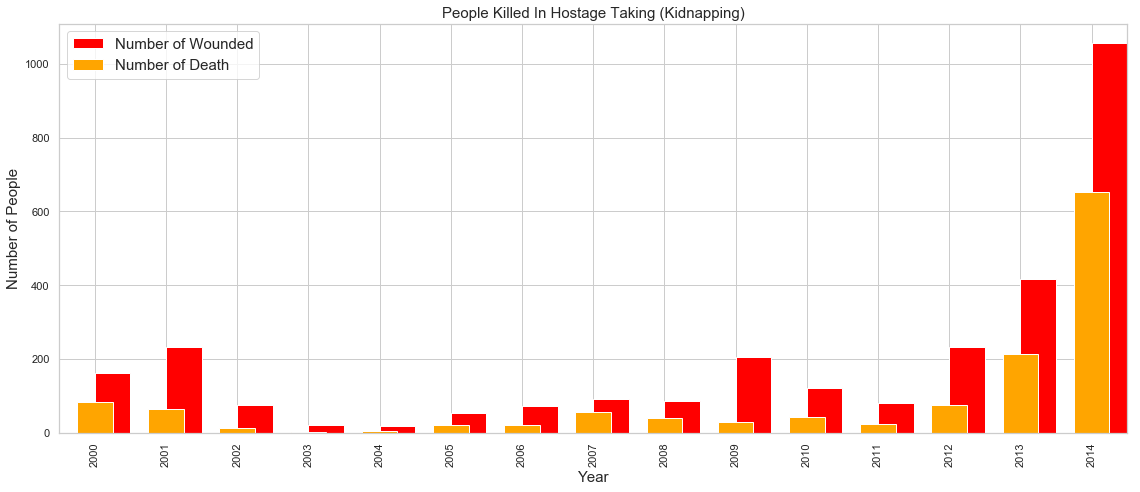

In [36]:
Hostage_Taking_Kidnapping = mappingDF[(mappingDF["attacktype1_txt"] == "Hostage Taking (Kidnapping)")]
Hostage_Taking_Kidnapping_Year = Hostage_Taking_Kidnapping.groupby(['iyear'])['nkill', 'nwound'].sum().reset_index().sort_values(['iyear'], ascending=True)

fig, ax1 = plt.subplots(figsize=(16,7))

Hostage_Taking_Kidnapping_Year.plot(kind="bar", x='iyear', y='nkill', position=0, ax=ax1, color="red")
Hostage_Taking_Kidnapping_Year.plot(kind="bar", x='iyear', y='nwound', stacked=True, ax=ax1, color="orange")

ax1.set_ylabel("Number of People", fontsize = 15)
ax1.set_xlabel("Year", fontsize = 15)
ax1.set_title("People Killed In Hostage Taking (Kidnapping)", fontsize = 15)
ax1.legend(["Number of Wounded", "Number of Death"], fontsize = 15)
plt.show()

Hostage_Taking_Kidnapping = mappingDF[(mappingDF["attacktype1_txt"] == "Hostage Taking (Kidnapping)")]
Hijacking = mappingDF[(mappingDF["attacktype1_txt"] == "Hijacking")]
Hostage_Taking_Barricade_Incident = mappingDF[(mappingDF["attacktype1_txt"] == "Hostage Taking (Barricade Incident)")]


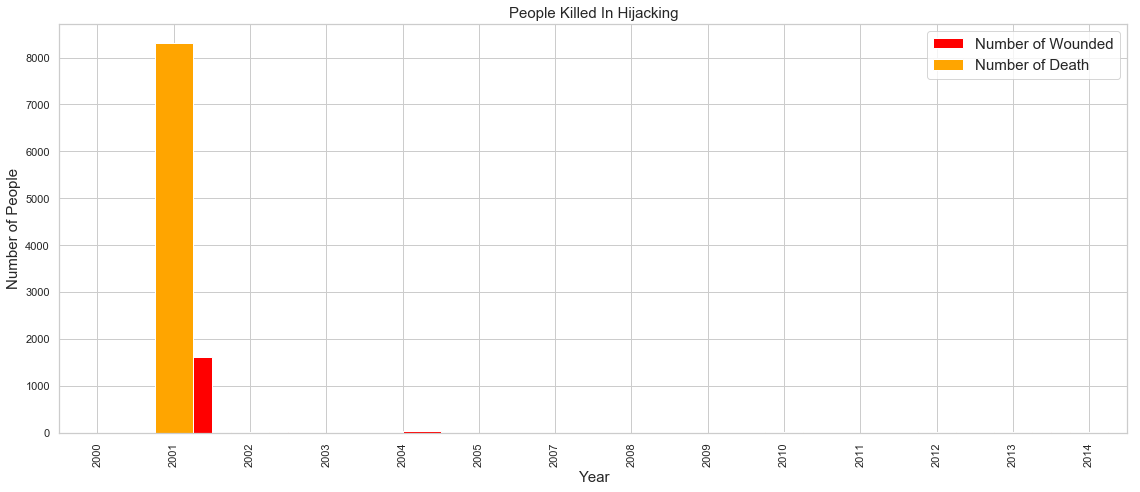

In [37]:
Hijacking = mappingDF[(mappingDF["attacktype1_txt"] == "Hijacking")]
Hijacking_Year = Hijacking.groupby(['iyear'])['nkill', 'nwound'].sum().reset_index().sort_values(['iyear'], ascending=True)

fig, ax1 = plt.subplots(figsize=(16,7))

Hijacking_Year.plot(kind="bar", x='iyear', y='nkill', position=0, ax=ax1, color="red")
Hijacking_Year.plot(kind="bar", x='iyear', y='nwound', stacked=True, ax=ax1, color="orange")

ax1.set_ylabel("Number of People", fontsize = 15)
ax1.set_xlabel("Year", fontsize = 15)
ax1.set_title("People Killed In Hijacking", fontsize = 15)
ax1.legend(["Number of Wounded", "Number of Death"], fontsize = 15)
plt.show()

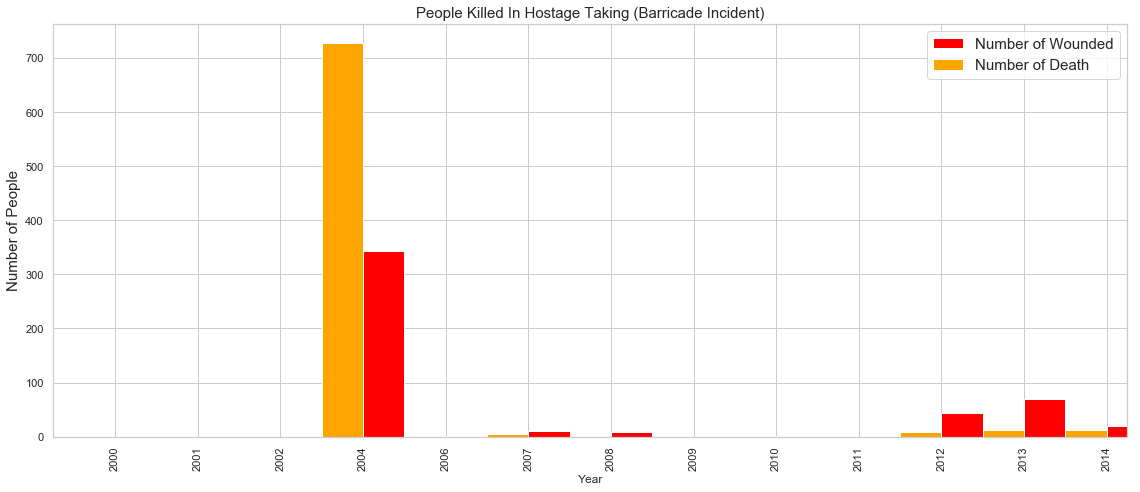

In [38]:
Hostage_Taking_Barricade_Incident = mappingDF[(mappingDF["attacktype1_txt"] == "Hostage Taking (Barricade Incident)")]
Hostage_Taking_Barricade_Incident_Year = Hostage_Taking_Barricade_Incident.groupby(['iyear'])['nkill', 'nwound'].sum().reset_index().sort_values(['iyear'], ascending=True)

fig, ax1 = plt.subplots(figsize=(16,7))

Hostage_Taking_Barricade_Incident_Year.plot(kind="bar", x='iyear', y='nkill', position=0, ax=ax1, color="red")
Hostage_Taking_Barricade_Incident_Year.plot(kind="bar", x='iyear', y='nwound', position=1, ax=ax1, color="orange")

ax1.set_ylabel("Number of People", fontsize = 15)
ax1.set_xlabel("Year")
ax1.set_title("People Killed In Hostage Taking (Barricade Incident)", fontsize = 15)
ax1.legend(["Number of Wounded", "Number of Death"], fontsize = 15)
plt.show()

In [39]:
pd.set_option('display.max_colwidth', -1)

cond2 = (mappingDF['nkill']>300) | (mappingDF['nwound']>300) 
most_woundkill = mappingDF[cond2]
print(most_woundkill.shape)
# print(most_woundkill['summary'])

cols = ['country_txt','attacktype1_txt','weaptype1_txt','weapsubtype1_txt','weapdetail','nkill','nwound','summary']
most_woundkill_list = most_woundkill[cols].values.tolist()

most_wounded_killedDF = pd.DataFrame(most_woundkill_list)
print(most_wounded_killedDF)


(8, 43)
                                  0                                    1  \
0  United States                     Hijacking                             
1  Russia                            Hostage Taking (Barricade Incident)   
2  Iraq                              Bombing/Explosion                     
3  Iraq                              Bombing/Explosion                     
4  Democratic Republic of the Congo  Facility/Infrastructure Attack        
5  Thailand                          Bombing/Explosion                     
6  South Sudan                       Hostage Taking (Kidnapping)           
7  Syria                             Hostage Taking (Kidnapping)           

                                                                             2  \
0  Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)   
1  Explosives                                                                    
2  Explosives                                                

### Conclusion From Part III

From the bar plots, it is clear that the number 1 killing attack types are the armed assault where we can see that there are more deaths to wounded. Next, bomb explosion caused more injuries as there are more wounded. The wounded and killed in assassination are about the same. Lastly there aren't much deaths and wounded for hostage taking (kidnapping), hijacking and hostage taking (Baracade incident). This indicates that terrorists, while they may be seeking to wound and kill, they are possibly more interested in striking fear among the public and let their agendas be made known.

We also found that for incidents that injured more than 300 people, the most recurring form of attack is through
vehicles.

---

## Part IV: Geographic Heat Map of Terrorists attacks

In this part, we seek to determine the common location that stood out among the attacks. This allows us to understand which locations are high risk areas and the pattern of terrorist attacks.

Hypothesis of being a terrorist attack (kill or wound > 10)


In [41]:
cond1 = (mappingDF["nkill"] > 10) | (mappingDF["nwound"] > 10)
cond2 = mappingDF["success"]==1
terrorist_attacks = mappingDF[cond1 & cond2]
print(terrorist_attacks.shape)

(1645, 43)


In [42]:
# mappingDF_LongLatSuc = []
# cols = ['longitude','latitude','success']
# mappingDF_LongLatSuc = mappingDF[cols].values.tolist()
# print(mappingDF_LongLatSuc[:3])

print(terrorist_attacks['attacktype1_txt'].unique())

mappingDF_long = terrorist_attacks['longitude'].values.tolist()
mappingDF_lat = terrorist_attacks['latitude'].values.tolist()
mappingDF_attack_type = terrorist_attacks['attacktype1_txt'].values.tolist()

for row, item in enumerate(mappingDF_attack_type):
    if item == "Unknown":
        mappingDF_attack_type[row] = 8
    elif item == "Bombing/Explosion":
        mappingDF_attack_type[row] = 7
    elif item == "Armed Assault":
        mappingDF_attack_type[row] = 6
    elif item == "Hostage Taking (Kidnapping)":
        mappingDF_attack_type[row] = 5
    elif item == "Assassination":
        mappingDF_attack_type[row] = 4
    elif item == "Unarmed Assault":
        mappingDF_attack_type[row] = 3
    elif item == "Facility/Infrastructure Attack":
        mappingDF_attack_type[row] = 2
    elif item == "Hijacking":
        mappingDF_attack_type[row] = 1
    elif item == "Hostage Taking (Barricade Incident)":
        mappingDF_attack_type[row] = 0

print(mappingDF_long[:3])
print(mappingDF_lat[:3])
print(mappingDF_attack_type[:3])

['Unknown' 'Bombing/Explosion' 'Armed Assault'
 'Hostage Taking (Kidnapping)' 'Assassination' 'Unarmed Assault'
 'Facility/Infrastructure Attack' 'Hijacking'
 'Hostage Taking (Barricade Incident)']
[80.399966, 74.789902, 2.553056]
[9.563842, 34.08374, 36.5175]
[8, 7, 6]


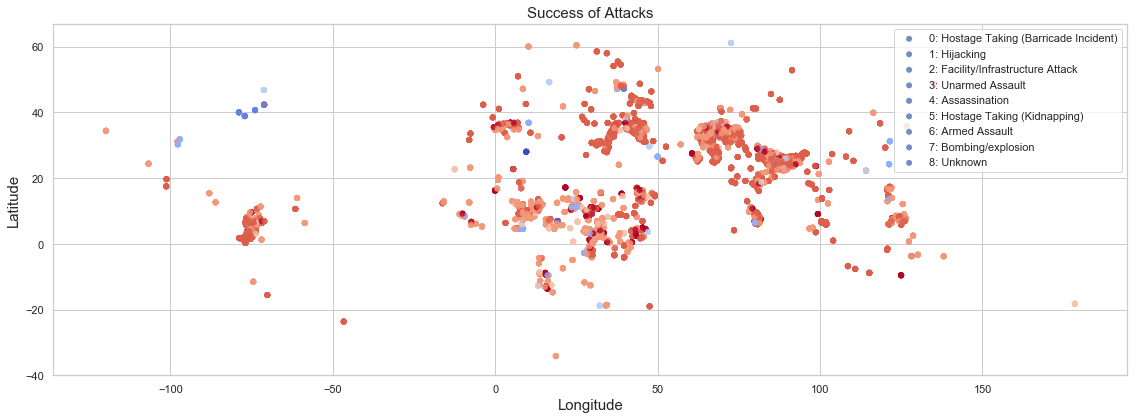

In [44]:
# Add labels to the chart
fig, ax = plt.subplots(figsize=(16, 6))

plt.xlabel("Longitude", fontsize = 15)
plt.ylabel("Latitude", fontsize = 15)
plt.title("Success of Attacks", fontsize = 15)

for color in ['0: Hostage Taking (Barricade Incident)', '1: Hijacking', '2: Facility/Infrastructure Attack', '3: Unarmed Assault', '4: Assassination', '5: Hostage Taking (Kidnapping)', '6: Armed Assault', '7: Bombing/explosion', '8: Unknown']:
    plt.scatter(mappingDF_long, # X-axis
            mappingDF_lat, # Y-axis
            c=mappingDF_attack_type, # Color based on satisfaction
            cmap=plt.cm.coolwarm, # Color scheme
            vmin=0, # Min Value
            vmax=8, # Max value
            label=color,
            #s=scale, 
            alpha=0.8, edgecolors='none')

ax.legend()
ax.grid(True)
plt.show()

In [47]:
fig, ax = plt.subplots(figsize=(16, 6))

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Success of Attacks")
# Plot the points on the graph, as a scatter plot
s=plt.scatter(mappingDF_long, # X-axis
            mappingDF_lat, # Y-axis
            c=mappingDF_attack_type, # Color based on satisfaction
            cmap=plt.cm.coolwarm, # Color scheme
            vmin=0, # Min Value
            vmax=8, # Max value
            alpha=1)

#Create the color bar
cbar = plt.colorbar(mappable=s, ax=ax)
cbar.set_label("Type of Successful Attacks")

# Show the world map 
mplleaflet.show(fig = ax.figure)

### Conclusion From Part IV

From the heat map of the terrorist attacks, it is clear that the Middle East, South Africa and some parts of Asia(India, Philipines) region are places most prone to Terrorist Attacks in the world. 

---

## Part VI: Supervised Machine Learning - Decision Tree

To identify which features contribute to most to the success of these terrorist attacks, we trained a Decision Tree Model to rank the Feature Importance for the Global Terroism Dataset

We considered the following features and decided to use the 1st 4 numerical features:

1. suicide: Whether the attack involved suicide (of the terrorist)
2. attacktype1: Category of attack
3. targtype1: Category of targets (victims) (ID)
4. weaptype1: Category of weapons used

5. attacktype1_txt: Category of attack (ID)
6. attacktype2: Category of attack (should there be more than 1 category)
7. attacktype2_txt: Category of attack (should there be more than 1 category) (ID)
8. attacktype3: Category of attack (should there be more than 2 categories)
9. attacktype3_txt: Category of attack (should there be more than 2 categories) 
10. targtype1_txt: Category of targets (victims)
11. targsubtype1: Sub-category of targets (victims) (ID)
12. targsubtype1_txt: Sub-category of targets (victims) 
13. target1: Specific description of target
14. weaptype1_txt: Type of weapon
15. weapsubtype1: Type of weapon (ID)
16. weapsubtype1_txt
17. weapdetail

### Train-Test Split
Assigning the feature columns to $\textbf{X}$ and the `Outcome` score to $\textbf{y}$.

In [51]:
# Assign the columns to X and y accordingly
feature_list = [ 'suicide',
                'attacktype1',
                 'targtype1',
                 'weaptype1'] 

X = df[feature_list]
y = df['success']
print(X.shape)
print(y.shape)

(65499, 4)
(65499,)


Now we use `sklearn.model_selection.train_test_split` to split our dataset into two groups - the **training set** and the **test set**. We set the **test set** to be $20\%$ of the whole dataset.

In [52]:
# Used train_test_split to obtain the training set and test set. Use random_state=0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(52399, 4)
(13100, 4)
(52399,)
(13100,)


### Train Without Pruning

Directly implement the `DecisionTreeClassifier` on the training set.

In [56]:
# Creating the model
dtree = DecisionTreeClassifier(criterion='entropy',random_state=0)

# Fitting the model
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

### Test

In [57]:
# To get predicted values of y
y_pred = dtree.predict(X_test)

In [58]:
# Finding the confusion matrix of the result
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Finding the accuracy score of the result
asr = accuracy_score(y_test, y_pred)
print(asr)

[[  384   874]
 [  176 11666]]
0.9198473282442748


### Train With Pruning

Directly implement the `DecisionTreeClassifier` on the training set. To ensure pruning, we set the `max_depth=3`.

In [59]:
dptree = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=0)
dptree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

### Test

In [60]:
# Getting the predicted y array
y_pred = dptree.predict(X_test)

In [61]:
# Finding the confusion matrix of the result
print(confusion_matrix(y_test,y_pred))

# Finding the accuracy score of the result
print(accuracy_score(y_test,y_pred))

[[  382   876]
 [  181 11661]]
0.9193129770992367


In [62]:
# Finding out the features that have the most importance
print("Feature importances:\n{}".format(dptree.feature_importances_))

Feature importances:
[0.         0.39928714 0.48700664 0.11370622]


### Determine Feature Importance

In [64]:
terrorism_features = feature_list
print(terrorism_features)

['suicide', 'attacktype1', 'targtype1', 'weaptype1']


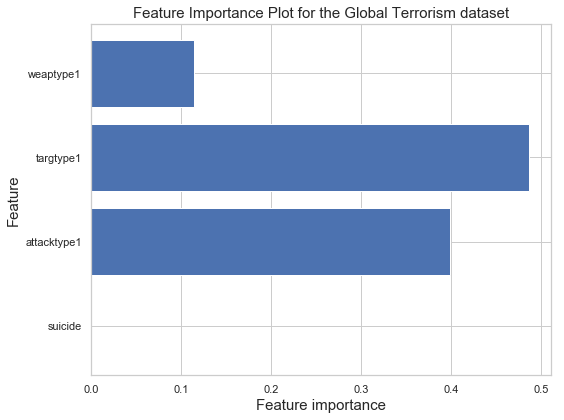

In [66]:
n_features = 4

plt.figure(figsize=(8,6))
plt.barh(range(n_features), dptree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), terrorism_features)
plt.xlabel("Feature importance", fontsize = 15)
plt.ylabel("Feature", fontsize = 15)
plt.title("Feature Importance Plot for the Global Terrorism dataset", fontsize = 15)
plt.yticks(np.arange(len(terrorism_features)) , terrorism_features)

plt.show()

### Conclusion of Part 5

From Part VI, we can say that the General Type of Target/ Victim (targtype1) is the most important feature which contributes most to the success of a terrorist attack. 

---

## General Conclusion

**From our Exploration Data Analysis, we have found that it is part of Terrorist Organisation's Mission to "claim responsibility" for their attack and are possibly most interested in striking fear among the public and make their agenda known to the world.**

**We also discovered:**
* **Number 1 killing attack type is Armed Assault where we can see that there are more deaths to wounded.** 
* **Bomb explosion caused more injuries as there are more wounded.**
* **Hostage taking (kidnapping), hijacking and hostage taking (Baracade incident) has inflicted the least effect as seen from the minimal deaths and wounded.** 
* **For incidents that injured more than 300 people, the most recurring form of attack is through vehicles.**
* **Middle East, South Africa and some parts of Asia(India, Philipines) region are places most prone to Terrorist Attacks in the world.**

**Lastly, from our Decision Tree Model, we found that the General Type of Target/Victim (targtype1) is the most important feature which contributes most to the success of a terrorist attack.**

## Acknowledgements

* The Global Terrorism Database is funded through START, by the US Department of State (Contract Number: SAQMMA12M1292) and the US Department of Homeland Security Science and Technology Directorate’s Office of University Programs (Award Number 2012-ST-061-CS0001, CSTAB 3.1). The coding decisions and classifications contained in the database are determined independently by START researchers and should not be interpreted as necessarily representing the official views or policies of the United States Government.

* Source: https://www.kaggle.com/START-UMD/gtd